In [85]:
import pandas as pd


df = pd.read_csv("Airline_Delay_Cause.csv")

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 318017 non-null  int64  
 1   month                318017 non-null  int64  
 2   carrier              318013 non-null  object 
 3   carrier_name         318013 non-null  object 
 4   airport              318014 non-null  object 
 5   airport_name         318017 non-null  object 
 6   arr_flights          317524 non-null  float64
 7   arr_del15            317285 non-null  float64
 8   carrier_ct           317525 non-null  float64
 9   weather_ct           317523 non-null  float64
 10  nas_ct               317529 non-null  float64
 11  security_ct          317529 non-null  float64
 12  late_aircraft_ct     317529 non-null  float64
 13  arr_cancelled        317529 non-null  float64
 14  arr_diverted         317527 non-null  float64
 15  arr_delay        

In [87]:
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,318017.000000,318017.000000,317524.000000,317285.000000,317525.000000,317523.000000,317529.000000,317529.000000,317529.000000,317529.000000,317527.000000,317523.000000,317525.000000,317529.000000,317529.000000,317527.000000,317529.000000
mean,2012.450957,6.497844,381.766670,72.905076,21.073149,2.616407,24.005228,0.179037,24.975734,7.207257,0.867674,4209.989113,1286.577224,220.567542,1099.516422,7.214845,1596.062993
std,5.678296,3.459423,1027.156722,198.936754,47.671580,9.968640,85.113757,0.844834,75.275223,37.216301,3.915772,12519.021012,3515.417309,861.521440,4636.475908,38.854685,4924.950687
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,0.000000,0.000000
25%,2007.000000,3.000000,59.000000,9.000000,3.000000,0.000000,1.680000,0.000000,1.640000,0.000000,0.000000,436.000000,148.000000,0.000000,56.000000,0.000000,79.000000
50%,2012.000000,6.000000,120.000000,23.000000,8.190000,0.580000,5.490000,0.000000,5.860000,1.000000,0.000000,1201.000000,437.000000,25.000000,203.000000,0.000000,351.000000
75%,2018.000000,10.000000,273.000000,56.000000,19.690000,2.000000,15.350000,0.000000,17.040000,4.000000,1.000000,3080.000000,1100.000000,159.000000,602.000000,0.000000,1110.000000
max,2022.000000,12.000000,21977.000000,6377.000000,1792.070000,717.940000,4091.270000,80.560000,1885.470000,4951.000000,256.000000,433687.000000,196944.000000,57707.000000,238440.000000,3760.000000,148181.000000


In [88]:
df.nunique()

year                      20
month                     12
carrier                   29
carrier_name              33
airport                  420
airport_name             420
arr_flights             7292
arr_del15               2315
carrier_ct             18352
weather_ct              5575
nas_ct                 21031
security_ct             1145
late_aircraft_ct       22206
arr_cancelled            672
arr_diverted             138
arr_delay              28025
carrier_delay          14358
weather_delay           5388
nas_delay              14086
security_delay           662
late_aircraft_delay    17665
dtype: int64

In [89]:

df = df.dropna()
df.isnull().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

In [90]:
df["arr_delay"] = pd.to_numeric(df["arr_delay"], errors="coerce")

In [91]:
import numpy as np


df_clean = df[(df["arr_delay"] >= 0) & (df["arr_delay"] < 600)]
df_clean["month_sin"] = np.sin(2 * np.pi * df_clean["month"]/12)
df_clean["month_cos"] = np.cos(2 * np.pi * df_clean["month"]/12)
df_clean["delay_ratio"] = df_clean["arr_del15"] / df_clean["arr_flights"]
df_clean["cancel_ratio"] = df_clean["arr_cancelled"] / df_clean["arr_flights"]
df_clean["divert_ratio"] = df_clean["arr_diverted"] / df_clean["arr_flights"]
df_clean["log_arr_flights"] = np.log1p(df_clean["arr_flights"])


C:\Users\39392\AppData\Local\Temp\ipykernel_25524\4120393008.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["month_sin"] = np.sin(2 * np.pi * df_clean["month"]/12)
C:\Users\39392\AppData\Local\Temp\ipykernel_25524\4120393008.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["month_cos"] = np.cos(2 * np.pi * df_clean["month"]/12)
C:\Users\39392\AppData\Local\Temp\ipykernel_25524\4120393008.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [92]:
df_sample = df_clean.sample(n=min(10000, len(df_clean)), random_state=42)

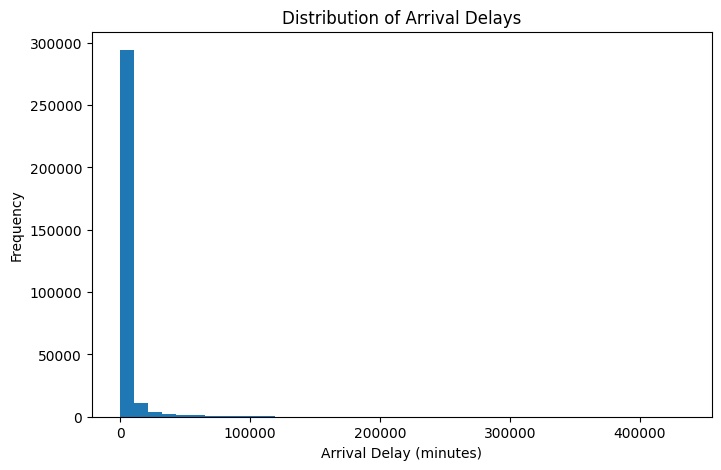

In [93]:
from matplotlib import pyplot as plt


plt.figure(figsize=(8, 5))
plt.hist(df["arr_delay"], bins=40)
plt.title("Distribution of Arrival Delays")
plt.xlabel("Arrival Delay (minutes)")
plt.ylabel("Frequency")
plt.show()


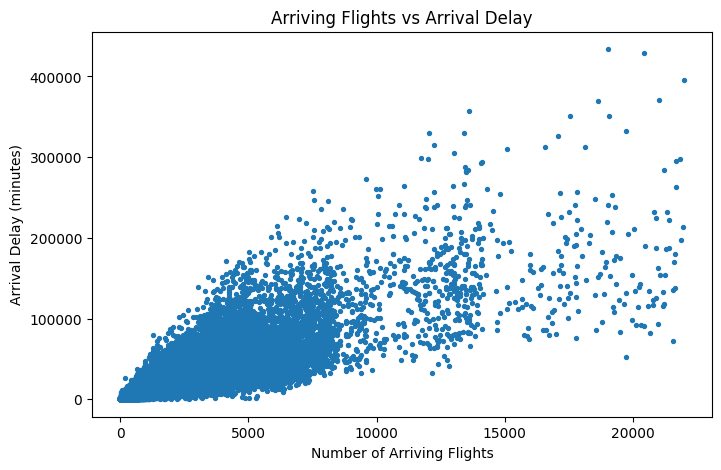

In [94]:
plt.figure(figsize=(8, 5))
plt.scatter(df["arr_flights"], df["arr_delay"], s=8)
plt.title("Arriving Flights vs Arrival Delay")
plt.xlabel("Number of Arriving Flights")
plt.ylabel("Arrival Delay (minutes)")
plt.show()


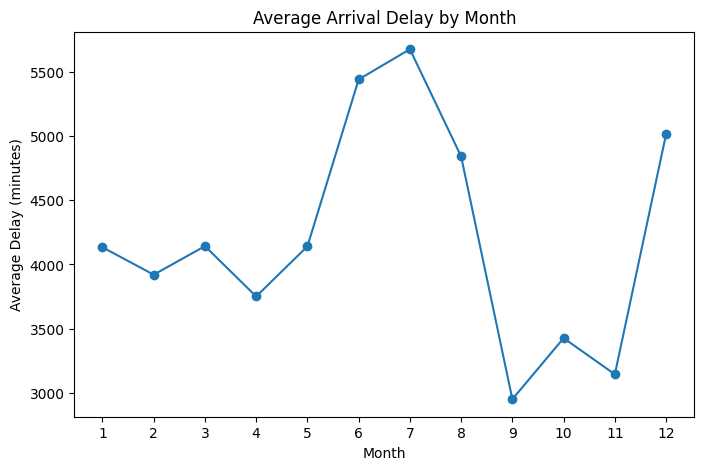

In [95]:
monthly_delay = df.groupby("month")["arr_delay"].mean()

plt.figure(figsize=(8, 5))
plt.plot(monthly_delay.index, monthly_delay.values, marker="o")
plt.title("Average Arrival Delay by Month")
plt.xlabel("Month")
plt.ylabel("Average Delay (minutes)")
plt.xticks(range(1, 13))
plt.show()


<Figure size 1000x600 with 0 Axes>

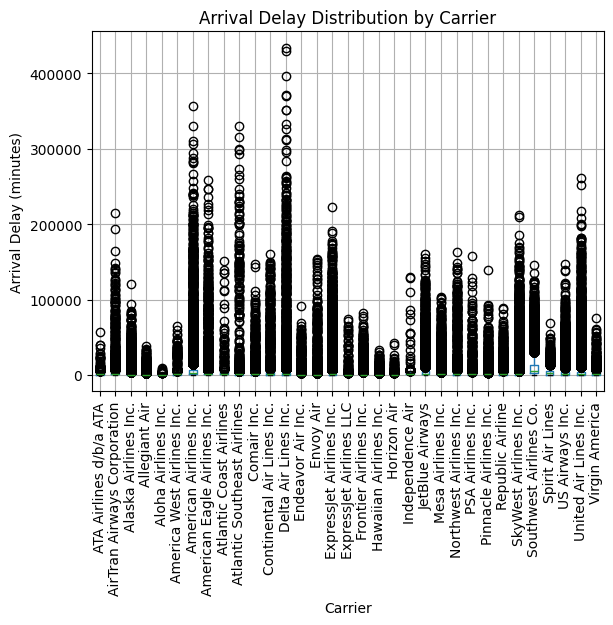

In [96]:
plt.figure(figsize=(10, 6))
df.boxplot(column="arr_delay", by="carrier_name", rot=90)
plt.title("Arrival Delay Distribution by Carrier")
plt.suptitle("")  # rimuove titolo doppio
plt.xlabel("Carrier")
plt.ylabel("Arrival Delay (minutes)")
plt.show()


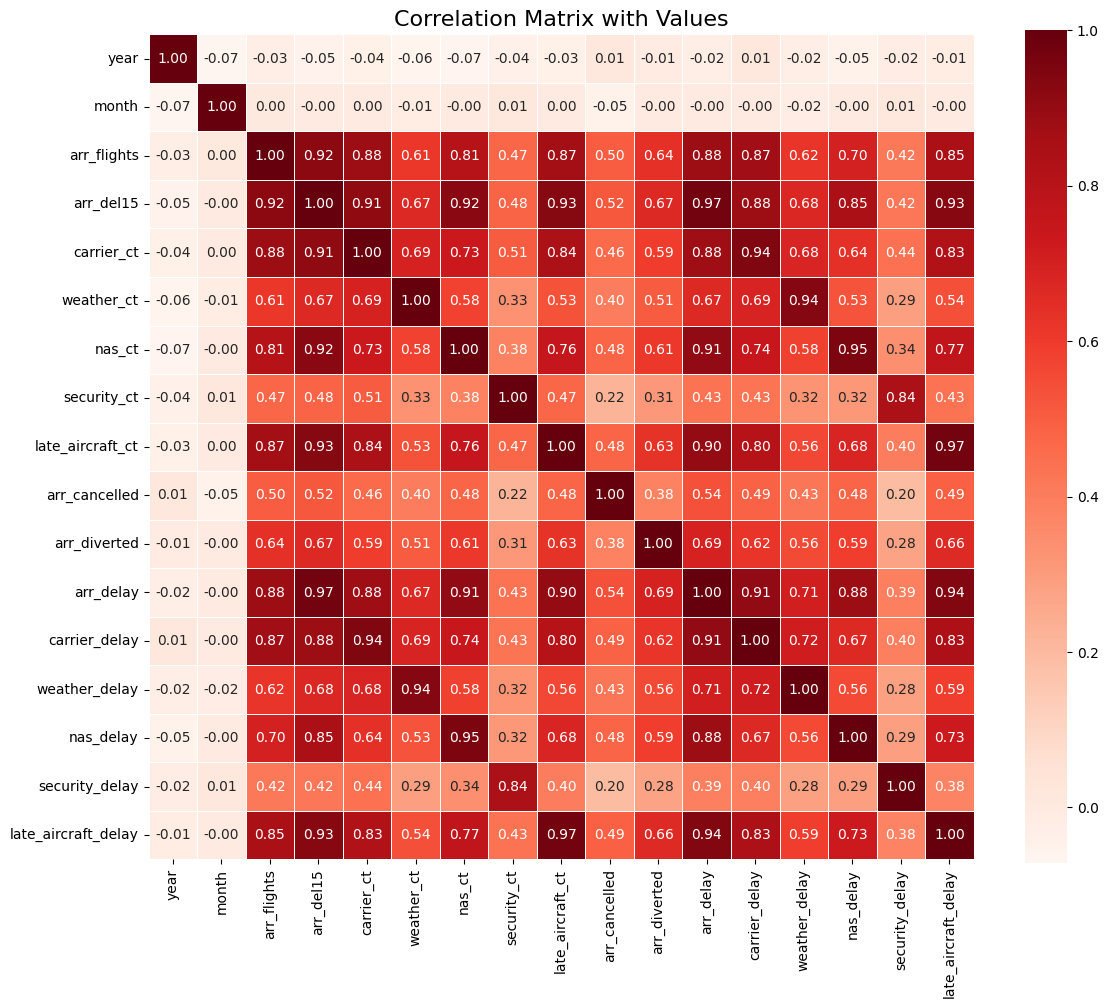

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = df.select_dtypes(include=["int64", "float64"])
# Calcola la matrice di correlazione
corr = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    annot=True,          # Mostra i numeri nelle celle
    fmt=".2f",           # Formato numerico (2 decimali)
    cmap="Reds",         # Gradiente da bianco a rosso
    cbar=True,           # Mostra la barra del colore
    square=True,         # Celle quadrate
    linewidths=0.5       # Linee tra le celle
)
plt.title("Correlation Matrix with Values", fontsize=16)
plt.tight_layout()
plt.show()


In [98]:
print(df["arr_delay"].describe())
print(df["arr_delay"].sort_values(ascending=False).head(10))


count    317261.000000
mean       4213.310599
std       12523.626528
min           0.000000
25%         437.000000
50%        1203.000000
75%        3083.000000
max      433687.000000
Name: arr_delay, dtype: float64
282932    433687.0
94023     429194.0
102229    395609.0
78084     370937.0
144670    369537.0
247832    356883.0
301266    350989.0
281504    350661.0
288631    332144.0
246528    330429.0
Name: arr_delay, dtype: float64


PULIZIA DATI


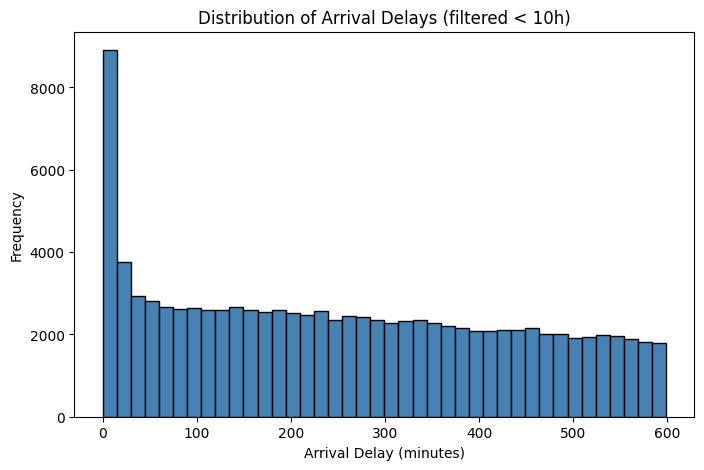

In [99]:
plt.figure(figsize=(8, 5))
plt.hist(df_clean["arr_delay"], bins=40, color="steelblue", edgecolor="black")
plt.title("Distribution of Arrival Delays (filtered < 10h)")
plt.xlabel("Arrival Delay (minutes)")
plt.ylabel("Frequency")
plt.show()

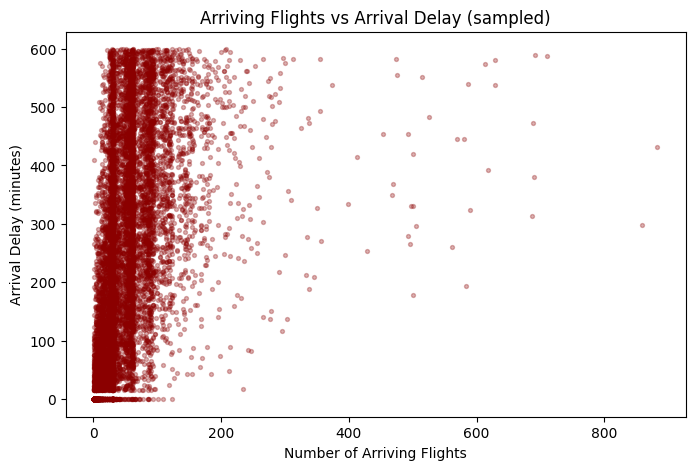

In [100]:
plt.figure(figsize=(8, 5))
plt.scatter(df_sample["arr_flights"], df_sample["arr_delay"], s=8, alpha=0.3, color="darkred")
plt.title("Arriving Flights vs Arrival Delay (sampled)")
plt.xlabel("Number of Arriving Flights")
plt.ylabel("Arrival Delay (minutes)")
plt.show()

C:\Users\39392\AppData\Local\Temp\ipykernel_25524\387186406.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["log_arr_flights"] = np.log1p(df_clean["arr_flights"])


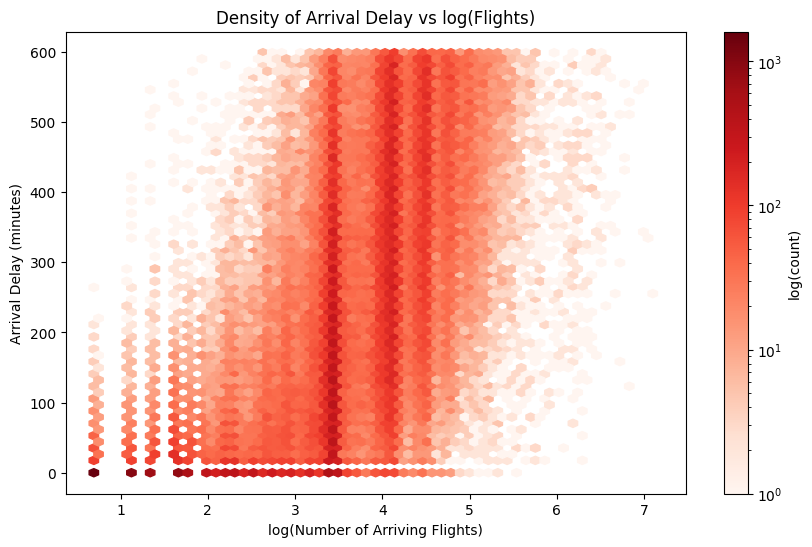

In [101]:
import numpy as np
import matplotlib.pyplot as plt


df_clean["log_arr_flights"] = np.log1p(df_clean["arr_flights"])


plt.figure(figsize=(10, 6))
plt.hexbin(df_clean["log_arr_flights"], df_clean["arr_delay"],
           gridsize=60, cmap="Reds", bins="log")
plt.colorbar(label="log(count)")
plt.title("Density of Arrival Delay vs log(Flights)")
plt.xlabel("log(Number of Arriving Flights)")
plt.ylabel("Arrival Delay (minutes)")
plt.show()


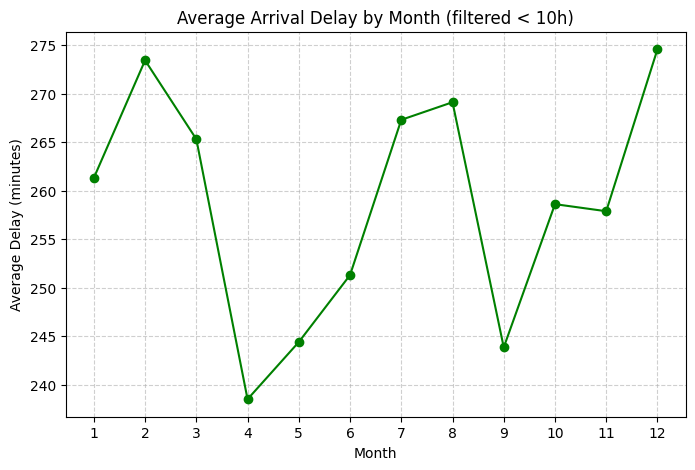

In [102]:
monthly_delay = df_clean.groupby("month")["arr_delay"].mean()

plt.figure(figsize=(8, 5))
plt.plot(monthly_delay.index, monthly_delay.values, marker="o", color="green")
plt.title("Average Arrival Delay by Month (filtered < 10h)")
plt.xlabel("Month")
plt.ylabel("Average Delay (minutes)")
plt.xticks(range(1, 13))
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

<Figure size 1200x600 with 0 Axes>

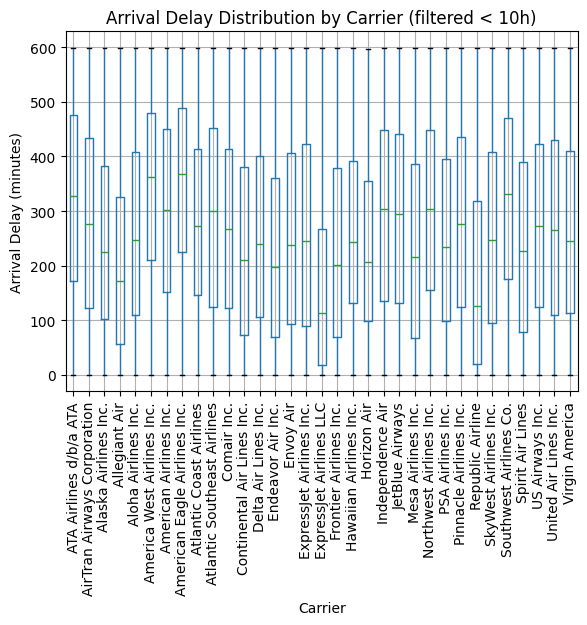

In [103]:
plt.figure(figsize=(12, 6))
df_clean.boxplot(column="arr_delay", by="carrier_name", rot=90)
plt.title("Arrival Delay Distribution by Carrier (filtered < 10h)")
plt.suptitle("")
plt.xlabel("Carrier")
plt.ylabel("Arrival Delay (minutes)")
plt.show()

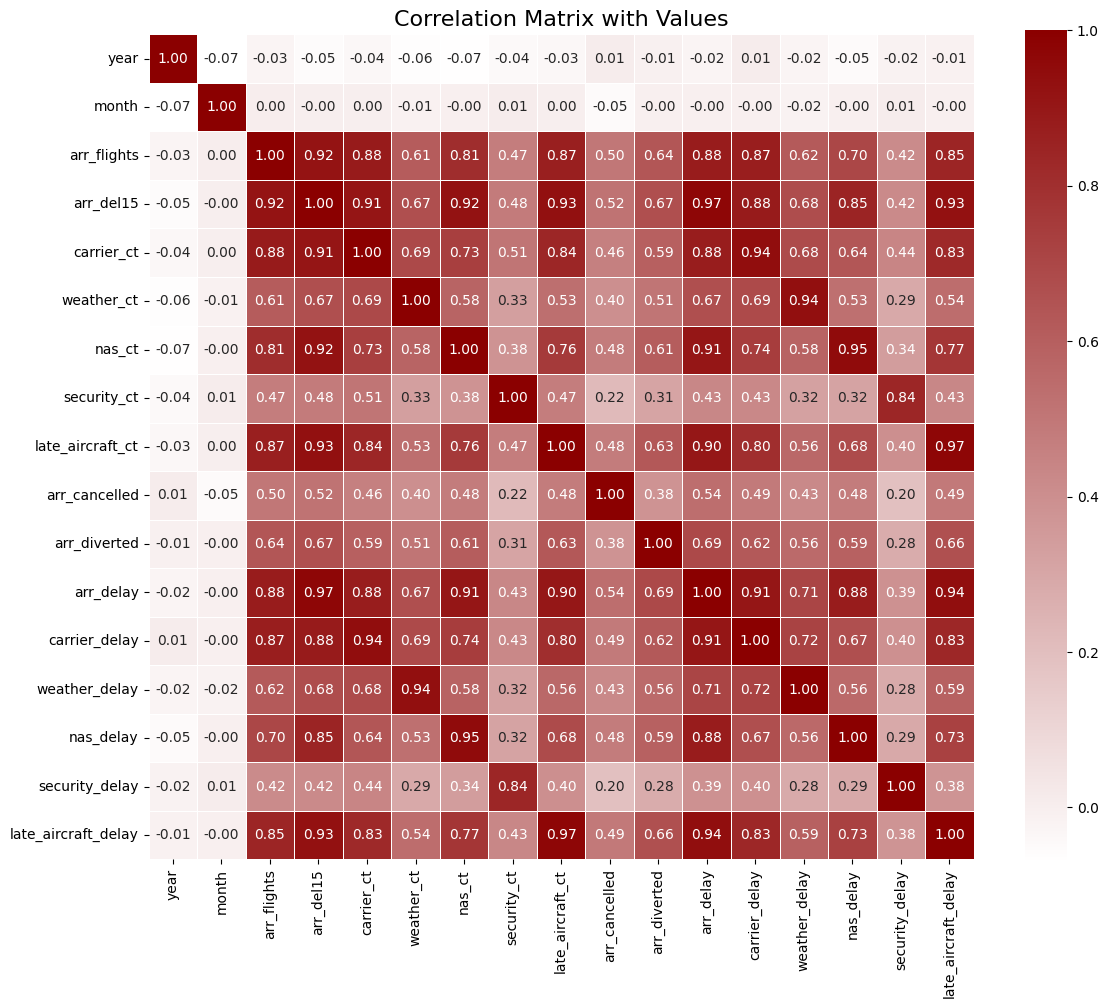

In [104]:


from matplotlib.colors import LinearSegmentedColormap


white_to_darkred = LinearSegmentedColormap.from_list("white_darkred", ["white", "#8B0000"])

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap=white_to_darkred,
    cbar=True,
    square=True,
    linewidths=0.5
)
plt.title("Correlation Matrix with Values", fontsize=16)
plt.tight_layout()
plt.show()


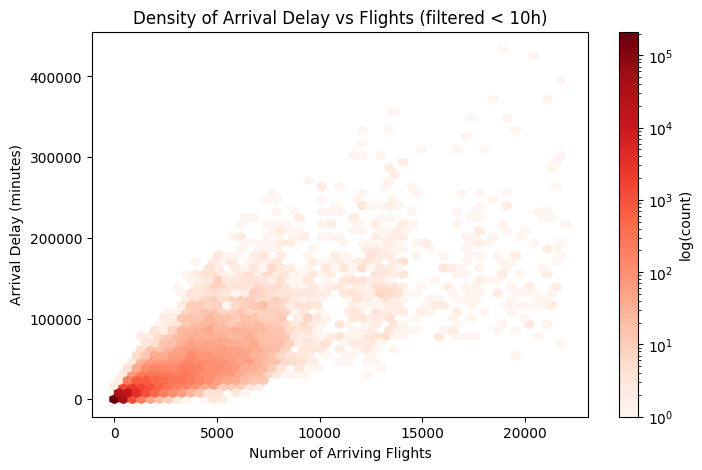

In [105]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hexbin(df["arr_flights"], df["arr_delay"], gridsize=50, cmap="Reds", bins="log")
plt.colorbar(label="log(count)")
plt.title("Density of Arrival Delay vs Flights (filtered < 10h)")
plt.xlabel("Number of Arriving Flights")
plt.ylabel("Arrival Delay (minutes)")
plt.show()


In [106]:
# 7. Statistiche finali
print("\nStatistiche arr_delay dopo pulizia:")
print(df_clean["arr_delay"].describe())
print("\nTop 10 ritardi (puliti):")
print(df_clean["arr_delay"].sort_values(ascending=False).head(10))
print(f"\nRighe originali: {len(df)}, Righe dopo pulizia: {len(df_clean)}")


Statistiche arr_delay dopo pulizia:
count    100510.000000
mean        257.652363
std         179.996519
min           0.000000
25%          98.000000
50%         244.000000
75%         409.000000
max         599.000000
Name: arr_delay, dtype: float64

Top 10 ritardi (puliti):
64012     599.0
242853    599.0
99927     599.0
270247    599.0
218455    599.0
249953    599.0
267233    599.0
68172     599.0
285721    599.0
211840    599.0
Name: arr_delay, dtype: float64

Righe originali: 317261, Righe dopo pulizia: 100510


Top 10 aeroporti con più ritardi (numero di voli ritardati):
airport
TUS    960
MSY    943
ABQ    899
MDT    865
OMA    860
AUS    839
SAT    795
ALB    780
MCI    775
OKC    758
Name: arr_delay, dtype: int64


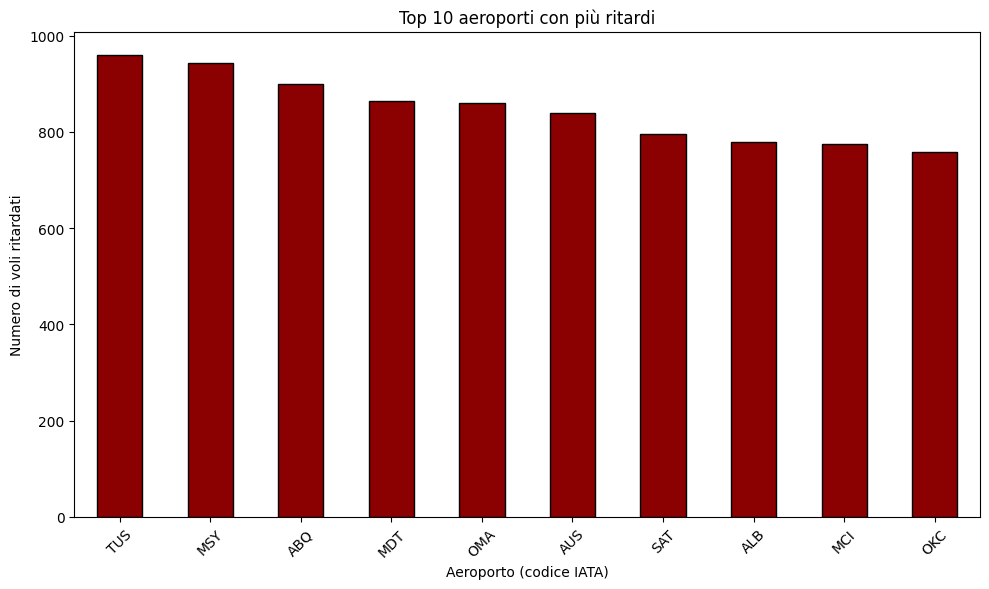

In [109]:
import matplotlib.pyplot as plt

# Top 10 aeroporti con più voli ritardati
top_airports = df_clean.groupby("airport")["arr_delay"].count().sort_values(ascending=False).head(10)

print("Top 10 aeroporti con più ritardi (numero di voli ritardati):")
print(top_airports)

# Grafico a barre
plt.figure(figsize=(10,6))
top_airports.plot(kind="bar", color="darkred", edgecolor="black")
plt.title("Top 10 aeroporti con più ritardi")
plt.xlabel("Aeroporto (codice IATA)")
plt.ylabel("Numero di voli ritardati")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


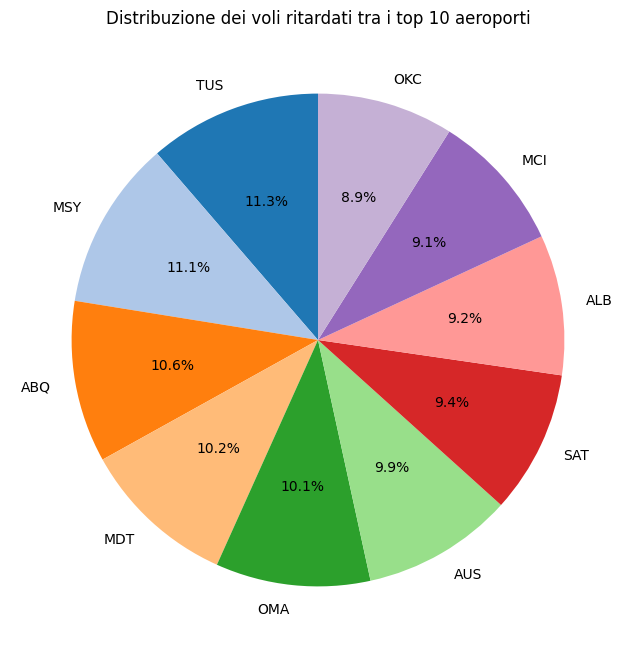

In [114]:
plt.figure(figsize=(8,8))
plt.pie(top_airports, labels=top_airports.index, autopct="%1.1f%%", startangle=90, colors=plt.cm.tab20.colors)
plt.title("Distribuzione dei voli ritardati tra i top 10 aeroporti")
plt.show()

In [ ]:
df_clean.to_csv("AirDelay_clean.csv", index=False)